In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tnrange

In [3]:
v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")
v = v[:,:50000].flatten()
dv = np.diff(v)
ddv = np.diff(dv)
#high_dv = np.where(dv[15000:30000][8000:12000] >= 0.1)[0]

high_dv = np.zeros((dv.shape[0]-1))

for i in tnrange(dv.shape[0] - 1):
    if dv[i] >= 0.08:
        neg_count = 0
        for j in range(10):
            if dv[i+j] <= -0.03:
                neg_count += 1
        if neg_count > 0:
            high_dv[i] += 1
        
print(np.where(high_dv == 1)[0].size)

high_dv_diff = np.diff(high_dv)
unique_high_dv = np.zeros((high_dv_diff.shape[0]))
for i in range(high_dv_diff.shape[0]):
    if high_dv_diff[i] == 1:
        unique_high_dv[i+1] += 1
print(np.sum(unique_high_dv))

<ipython-input-3-dae152a066bf>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(dv.shape[0] - 1):



2388
873.0


Text(0.5, 1.0, 'dV/dt')

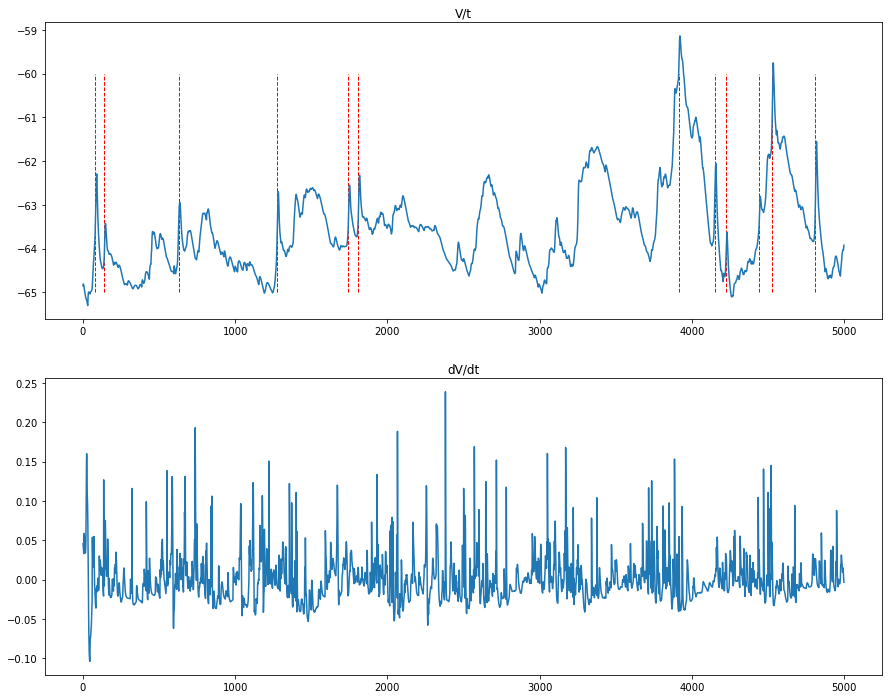

In [4]:
fig, axs = plt.subplots(nrows=2, figsize = (15,12))
axs[0].plot(v[400000:450000][15000:30000][5000:10000])
axs[0].vlines(np.where(unique_high_dv[400000:450000][15000:30000][5000:10000]==1)[0], ymin=-65,ymax=-60, color="red", linewidth=1, linestyle="--")
axs[1].plot(dv[25000:30000][:])
axs[0].set_title("V/t")
axs[1].set_title("dV/dt")


In [17]:
cos_basis_no = 19
T_max = 500

In [18]:
hist_basis = np.zeros((cos_basis_no, T_max))
for i in range(cos_basis_no):
    phi = 1.5707963267948966*i
    xmin = phi - 3.141592653589793
    xmax = phi + 3.141592653589793

    x_in = np.arange(0, T_max, 1)
    raw_cos = 5  * np.log(x_in + 1 + 1e-7)

    basis = 0.5*np.cos(raw_cos - phi) + 0.5
    basis[raw_cos < xmin] = 0.0
    basis[raw_cos > xmax] = 0.0
    hist_basis[i] = hist_basis[i] + basis

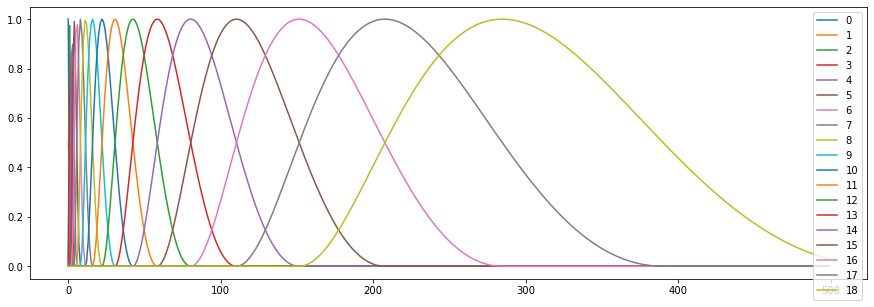

In [19]:
plt.figure(figsize = (15,5))
for i in range(cos_basis_no):
    plt.plot(hist_basis[i], label=str(i))
plt.legend()
    
#plt.xlim(-T_max,T_max)
#plt.xlim(0,50)

In [2]:
obs_basis_no = 13
T_max = 500
scale = 5
shift = 1

In [3]:
obs_basis = np.zeros((obs_basis_no*2-1, 2*T_max+1))
for i in range(obs_basis_no):
    phi = 1.5707963267948966*i
    xmin = phi - 3.141592653589793
    xmax = phi + 3.141592653589793
    if i == 0:
        x_in = np.arange(-T_max, T_max+1, 1)
        raw_cos = scale  * np.log(np.abs(x_in) + shift + 1e-7)
        basis = 0.5*np.cos(raw_cos - phi) + 0.5
        basis[raw_cos < xmin] = 0.0
        basis[raw_cos > xmax] = 0.0
        obs_basis[i] = basis
        
    else:
        x_in_pos = np.arange(0,T_max+1,1)
        x_in_neg = np.arange(-T_max,1,1)
        raw_cos_pos = scale  * np.log(np.abs(x_in_pos) + shift + 1e-7)
        raw_cos_neg = scale  * np.log(np.abs(x_in_neg) + shift + 1e-7)
        pos_basis = 0.5*np.cos(raw_cos_pos - phi)+ 0.5
        neg_basis = 0.5*np.cos(raw_cos_neg - phi)+ 0.5
        
        pos_basis[raw_cos_pos < xmin] = 0.0
        pos_basis[raw_cos_pos > xmax] = 0.0
        neg_basis[raw_cos_neg < xmin] = 0.0
        neg_basis[raw_cos_neg > xmax] = 0.0
        
        obs_basis[i*2-1,T_max:] = pos_basis
        obs_basis[i*2,:T_max+1] = neg_basis

(40.0, 60.0)

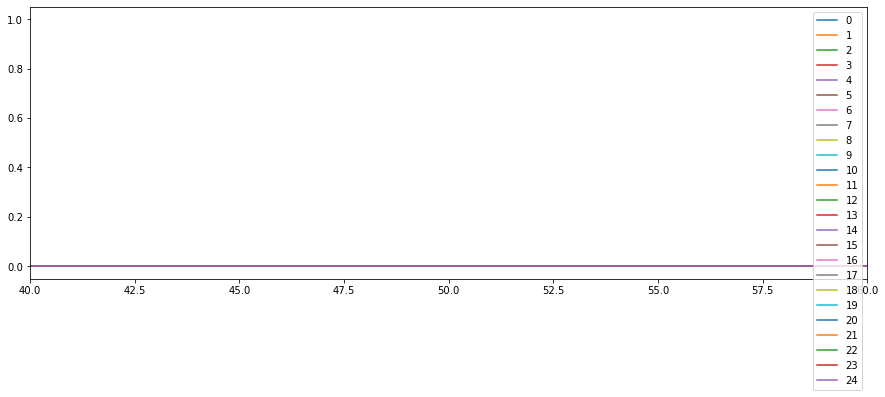

In [4]:
plt.figure(figsize = (15,5))
for i in range(obs_basis_no*2-1):
    plt.plot(obs_basis[i], label=str(i))
plt.legend()
    
#plt.xlim(-T_max,T_max)
plt.xlim(40,60)